In [1]:
import pandas as pd
import matplotlib.pyplot as plot
from scipy.stats import linregress


In [2]:
def to_timestamp(date):
    return date.timestamp()

In [3]:
dogRatesTweets = pd.read_csv("./dog_rates_tweets.csv", index_col=0)
date = dogRatesTweets["created_at"]
date= pd.to_datetime(date)
dogRatesTweets['created_at'] = pd.to_datetime(dogRatesTweets['created_at'])

In [4]:
pattern = r'(\d+(\.\d+)?)/10'
rating = dogRatesTweets['text'].str.contains(pattern,regex=True)
dogRatesTweets_filt = dogRatesTweets[rating]
del dogRatesTweets
rating = dogRatesTweets_filt['text'].str.extract(pattern)[0].astype(float)
dogRatesTweets_filt.insert(2,"rating",rating,True) ##1675 here
dogRatesTweets_filt = dogRatesTweets_filt[dogRatesTweets_filt["rating"] < 20]
dogRatesTweets_filt ##1669 here


/var/folders/fg/885k04tx1c19vmlhfrbl5mc80000gn/T/ipykernel_44900/1761417457.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  rating = dogRatesTweets['text'].str.contains(pattern,regex=True)


,created_at,text,rating
id,,,
994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0
993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0
993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0
992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0
991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0
...,...,...,...
1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0
1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0
1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0


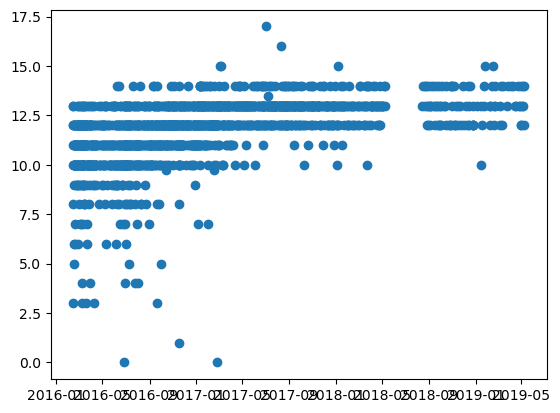

In [5]:
plot.scatter(dogRatesTweets_filt["created_at"],dogRatesTweets_filt["rating"])

In [6]:

dogRatesTweets_filt['timestamp'] = dogRatesTweets_filt['created_at'].apply(to_timestamp)
# dogRatesTweets_filt['timestamp'] = to_timestamp(dogRatesTweets_filt['created_at'])
fit1 = linregress(dogRatesTweets_filt["timestamp"], dogRatesTweets_filt["rating"])
fit1 =  dogRatesTweets_filt['timestamp']*fit1.slope + fit1.intercept
dogRatesTweets_filt['prediction'] = fit1
dogRatesTweets_filt
del fit1

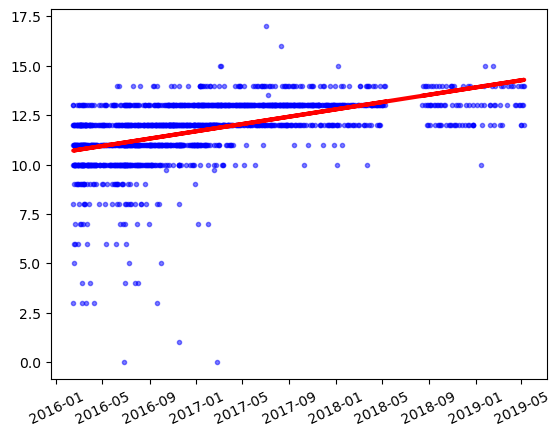

In [7]:
plot.xticks(rotation=25)
plot.plot(dogRatesTweets_filt["created_at"],dogRatesTweets_filt["rating"], 'b.', alpha=0.5)
plot.plot(dogRatesTweets_filt["created_at"], dogRatesTweets_filt['prediction'] ,'r-', linewidth=3)